# **About K means clustering:**

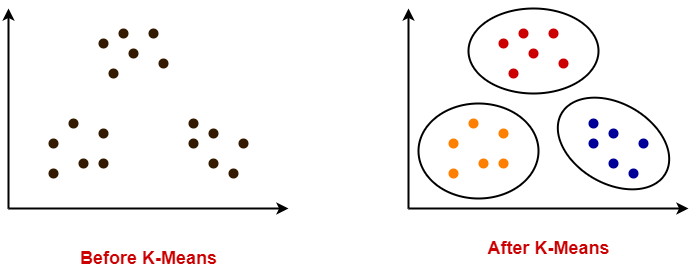

***K- means cluster is used to identify clusters from a raw data***

### ***Step 1:***
 Identify the number of clusters one would require for a data
 Assuming number of clusters (k)
### ***Step 2:***
  Randomly select k points. (assuming they belong to three differet clusters)
### ***Step 3:***
  With respect to these 3 points, we calculate distance between individual    points and these Cluster Centroids

Importing Libraries


In [ ]:
import numpy as np #perform mathematical operations on arrays
import pandas as pd #data analysis
import matplotlib.pyplot as plt #creating graphs
import seaborn as sns #visualise random graphs
from sklearn.cluster import KMeans #to import KMeans


Importing Dataset and Performing Analysis

In [ ]:
#loading the data from csv file to a panda dataframe
customer_data=pd.read_csv("/content/Mall_Customers.csv")

If the spending score is greater than 70 --> The person spends a lot of money in the mall.  

In [ ]:
customer_data.head() #first 5 values

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Measuring the number of rows and coloums

In [ ]:
customer_data.shape  #200 rows and 5 coloums --> 200 different observations(customers) and 5 features

(200, 5)

In [ ]:
customer_data.info()  #getting information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#cheking for missing values
customer_data.isnull().sum() #issum()--> takes the sum of number of null values
#if there are missing values, we conisder either the previous value,the next value, or the average value to replace missing values with suitable values


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We want to classify customers into groups, based upon their Annual income and spending score. So our main focus will be on those two coloumns


In [ ]:
X=customer_data.iloc[:,[3,4]].values #selecting the 4th and 5th coloumns
print(X) #in the output printed, the first coloumn is the Annual income and the second coloums in the spending score

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
 # finding wcss value for different number of clusters
# wcss--> within clusters sum of squares
wcss = []

for i in range(1,11):
  #we take range as 1-10 as we want to find the best number of clusters for the project
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
   #k-means ++ is a initiation method, there are other methods but kmeans++ is the best model.
  kmeans.fit(X)
  #random state refers to the random way in which the data would be arranges by the compiler before performing operations


  wcss.append(kmeans.inertia_) #gives wcss value

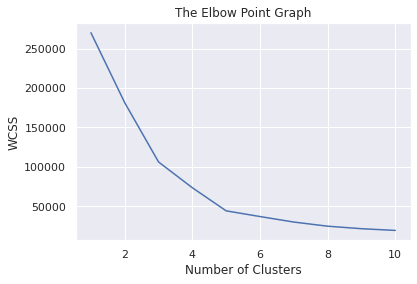

In [ ]:
# plot an elbow graph. Done to predict the number of clusters

sns.set() #wrt to seaborn library, would allow use of basic parameters for graph
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


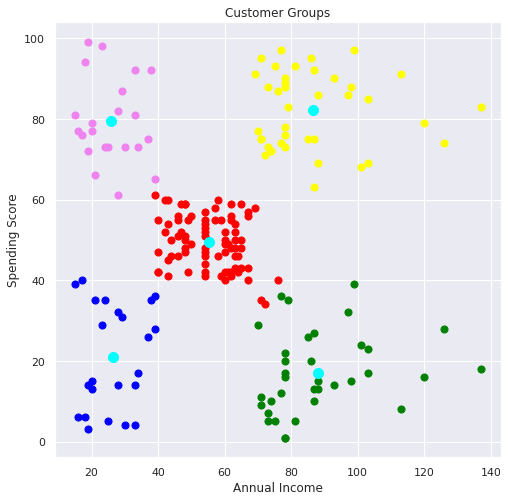

In [ ]:
# plotting all the clusters and their Centroids
# (X[Y==0,0]---> First 0 represents the cluster identity and the second represents the first coloumn of the original data
#X[Y==1,0] ---> First 1 represents the cluster identity and the 2nd zero represents the first coloumn of the original data
# s--> size
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids') # 0 represents x axis value of graph and 1 represents y axis value of graph

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

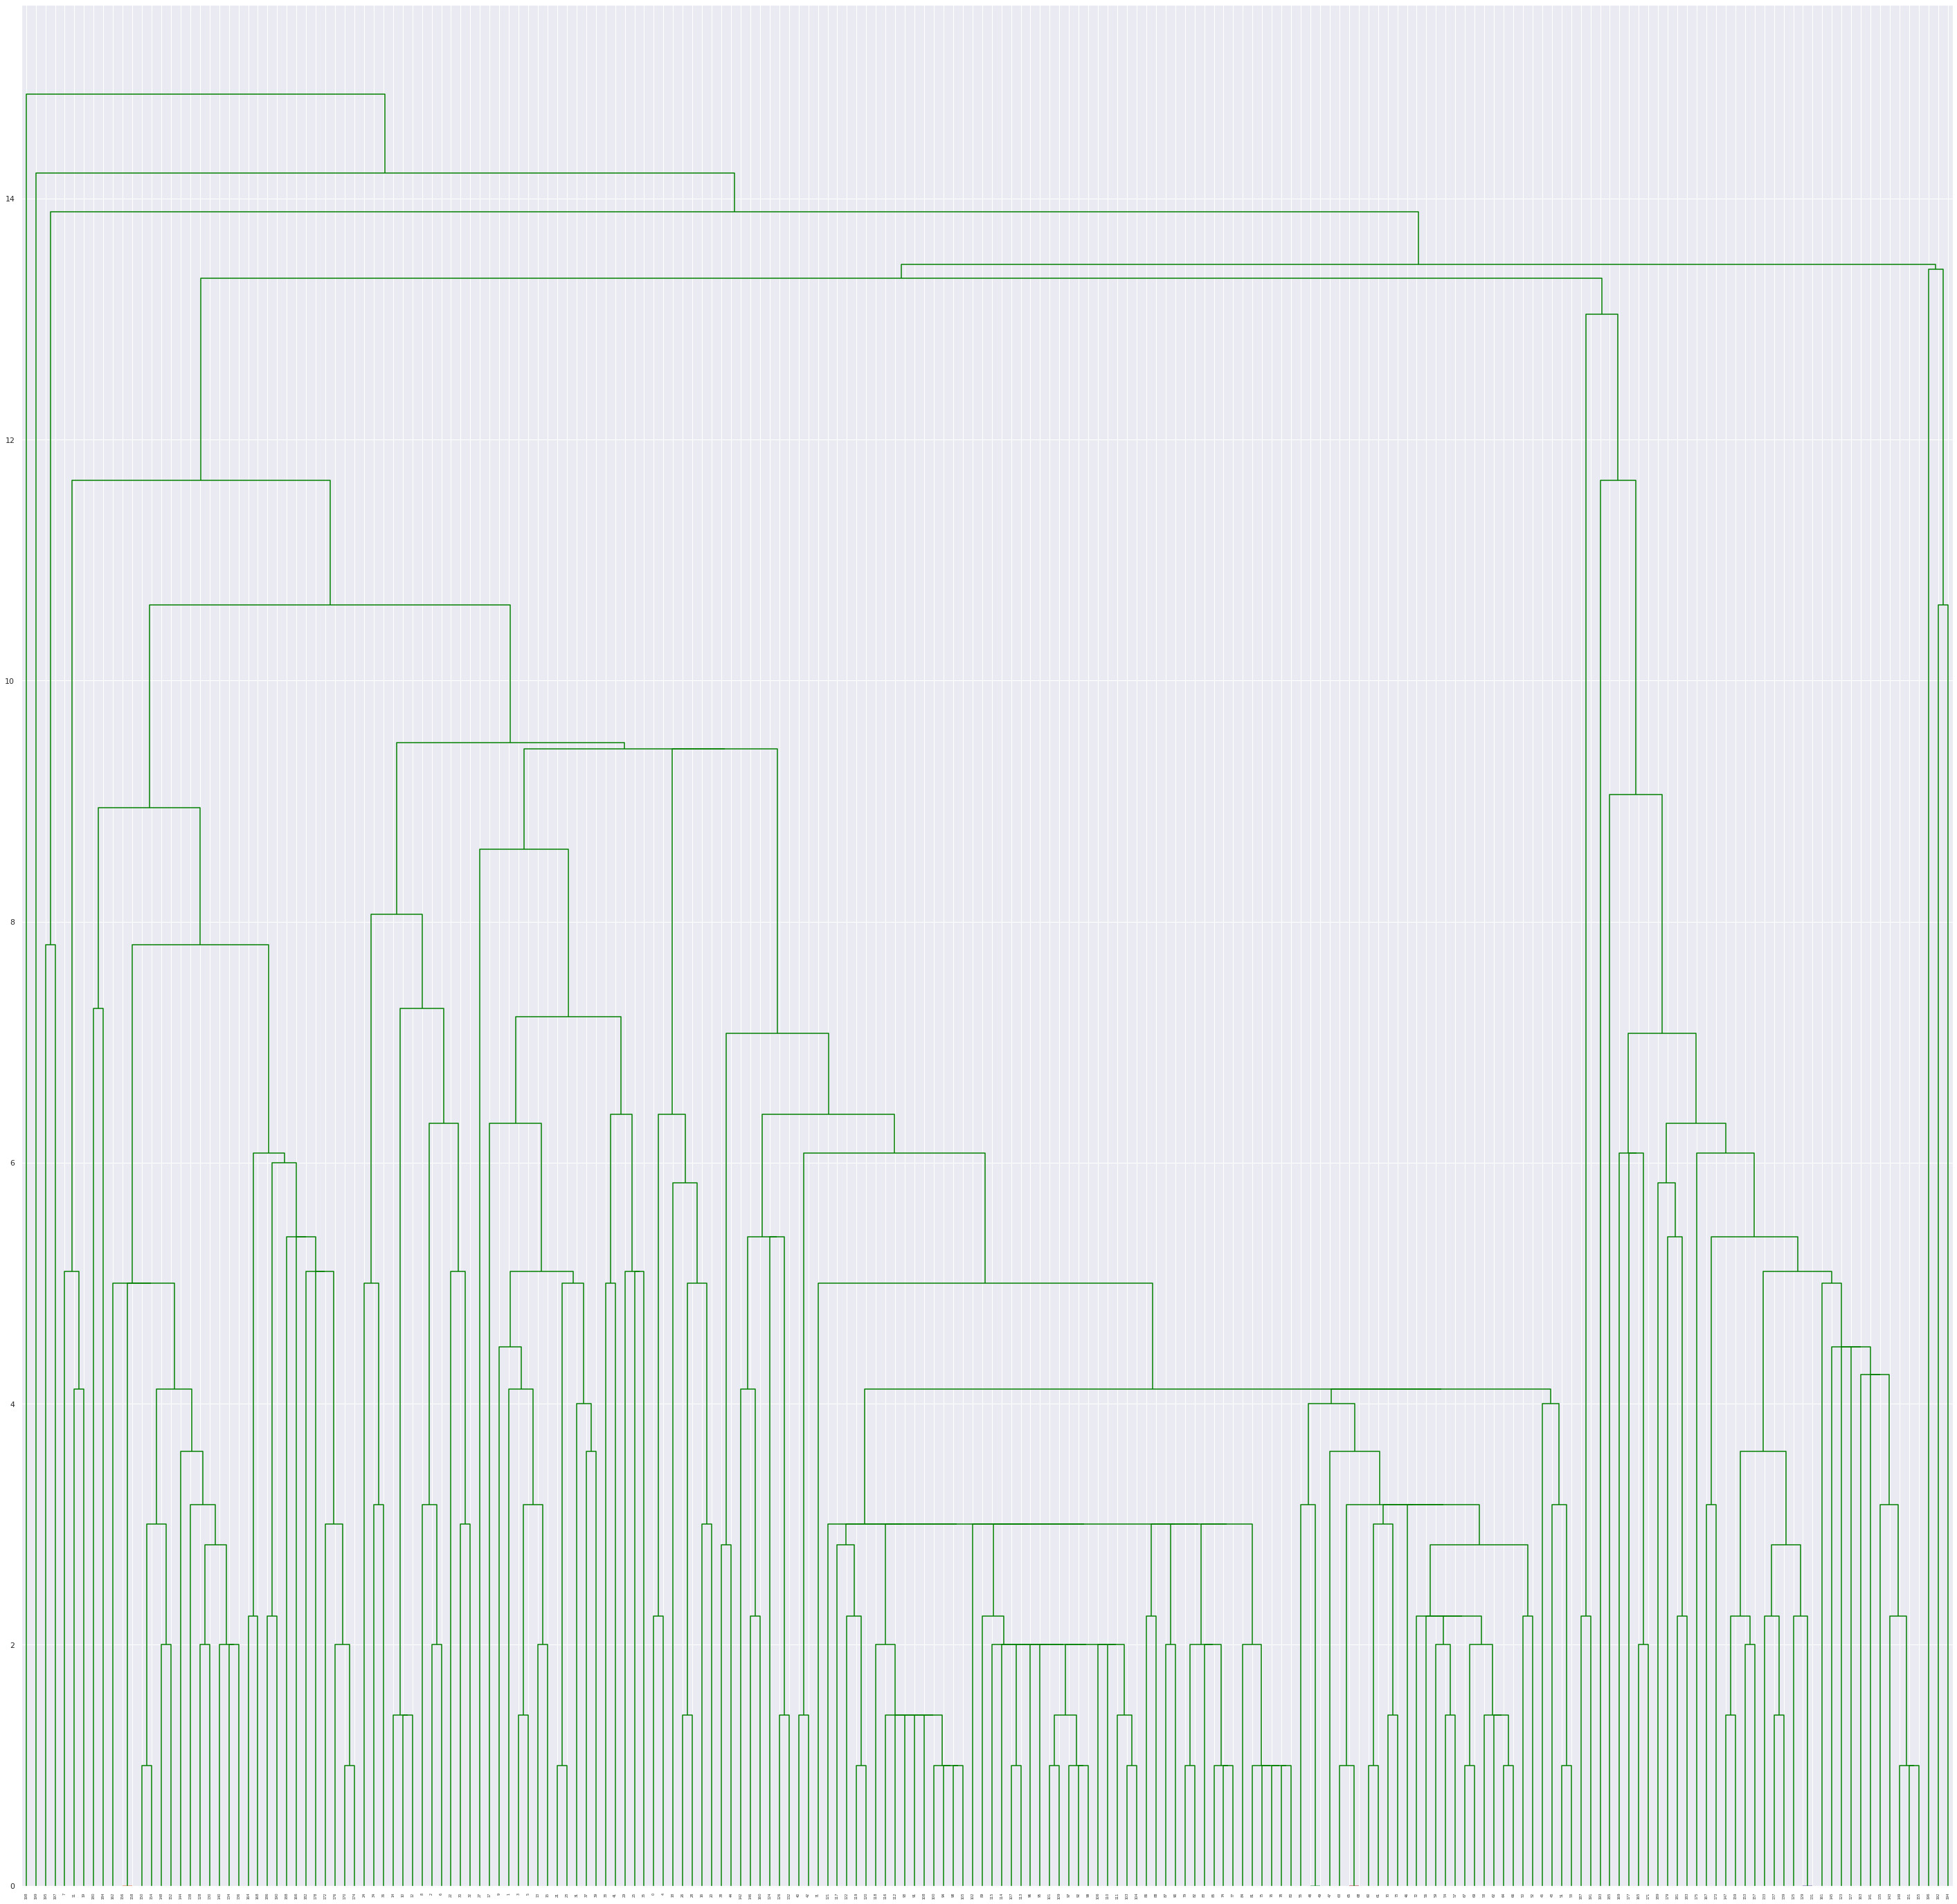

In [ ]:
# Plot the dendrogram in horizontal orientation
#dendogram shows the way in which clusters are formed.
# Import the python libraries
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

temp = hierarchy.linkage(X)
plt.figure(figsize=(50,50))
dn = hierarchy.dendrogram(
	temp, above_threshold_color="green", color_threshold=.7, orientation='top')

